In [84]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

print(sys.version)

3.7.7 (default, Mar 26 2020, 10:32:53) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [103]:
train = pd.read_csv('train.csv')
train['Age'] = round(train['Age'])

train['family_size'] = train['SibSp'] + train['Parch'] + 1
train['isalone'] = 1
train['isalone'].loc[train['family_size'] > 1] = 0

# split up title
names = []

for row in train['Name'] :
    names.append(row.split(' ', 2)[1])

train['title'] = names
train['title_Mr'] = np.where(train['title'] == 'Mr.',1,0)
train['title_Mrs'] = np.where(train['title'] == 'Mrs.',1,0)
train['title_Master.'] = np.where(train['title'] == 'Master.',1,0)
train['title_Miss'] = np.where(train['title'] == 'Miss.',1,0)
del[train['title']]

In [104]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,isalone,title_Mr,title_Mrs,title_Master.,title_Miss
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,1,0,0,0


In [87]:
# look at gender with Survived
train.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [88]:
# 74 % of females survived, while only 19% of males Survived
train.groupby('Sex')['Survived'].value_counts(normalize = True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

[Text(0, 0, 'Gordon,'),
 Text(0, 0, 'Messemaeker,'),
 Text(0, 0, 'Mlle.'),
 Text(0, 0, 'Mme.'),
 Text(0, 0, 'Ms.'),
 Text(0, 0, 'Mulder,'),
 Text(0, 0, 'the'),
 Text(0, 0, 'Mrs.'),
 Text(0, 0, 'y'),
 Text(0, 0, 'Miss.'),
 Text(0, 0, 'Master.'),
 Text(0, 0, 'Col.'),
 Text(0, 0, 'Major.'),
 Text(0, 0, 'Dr.'),
 Text(0, 0, 'Mr.')]

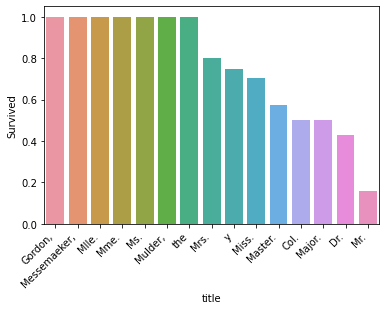

In [89]:
titles_means = pd.DataFrame(train.groupby('title')['Survived'].mean()).reset_index()
titles_means = titles_means[titles_means['Survived'] != 0.0]

g = sns.barplot('title', 'Survived', data = titles_means.sort_values('Survived' ,ascending = False))
g.set_xticklabels(
    g.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium')

[Text(0, 0, 'Mr.'),
 Text(0, 0, 'Miss.'),
 Text(0, 0, 'Mrs.'),
 Text(0, 0, 'Master.')]

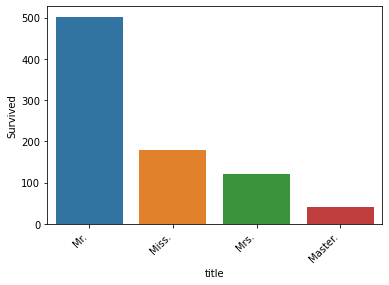

In [90]:
titles_means = pd.DataFrame(train.groupby('title')['Survived'].count()).reset_index()
titles_means = titles_means[titles_means['Survived'] > 10.0]

g = sns.barplot('title', 'Survived', data = titles_means.sort_values('Survived' ,ascending = False))
g.set_xticklabels(
    g.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium')

In [91]:
train.groupby('SibSp')['Survived'].value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [92]:

# peaks for survived/not survived passengers by their age
def kde_mapping(df1: pd.DataFrame) : 
    facet = sns.FacetGrid(df1, hue="Survived",aspect=4)
    facet.map(sns.kdeplot,'Age',shade= True)
    facet.set(xlim=(0, df1['Age'].max()))
    facet.add_legend()

    # average survived passengers by age
    fig, axis1 = plt.subplots(1,1,figsize=(15.5,4))
    average_age = df1[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
    g = sns.barplot(x='Age', y='Survived', data=average_age)
    g.set_xticklabels(g.get_xticklabels(), rotation = 90)

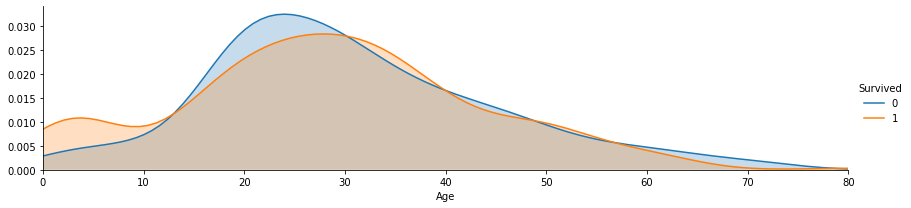

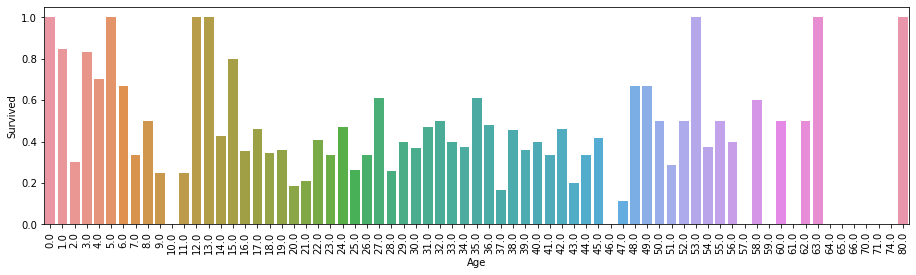

In [93]:
kde_mapping(train)

In [94]:
male = train[train['Sex'] == 'male']
female = train[train['Sex'] == 'female']


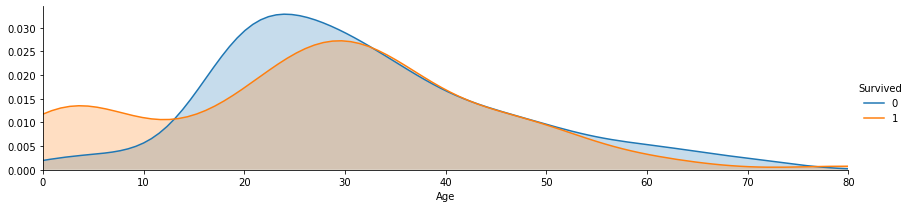

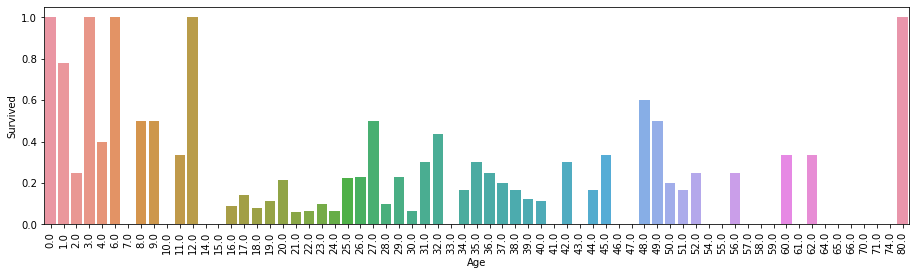

In [95]:
kde_mapping(male)

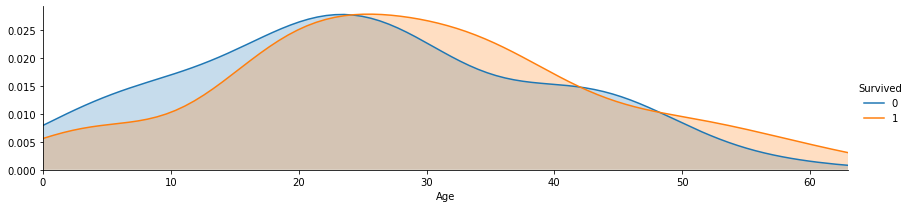

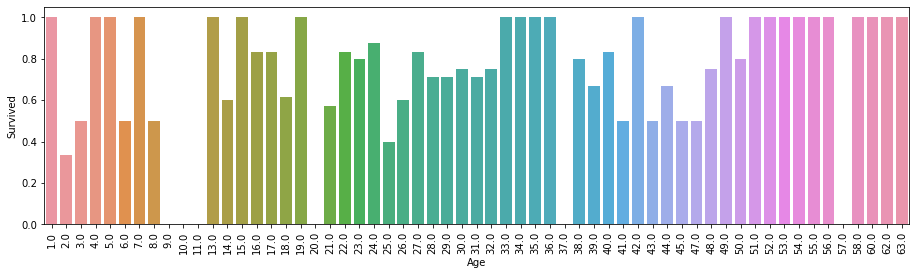

In [96]:
kde_mapping(female)

In [97]:
# interesting stuff for both males and females under 12

In [100]:
male.groupby('isalone')['Survived'].value_counts(normalize = True)

isalone  Survived
0        0           0.728916
         1           0.271084
1        0           0.844282
         1           0.155718
Name: Survived, dtype: float64

In [101]:
female.groupby('isalone')['Survived'].value_counts(normalize = True)

isalone  Survived
0        1           0.712766
         0           0.287234
1        1           0.785714
         0           0.214286
Name: Survived, dtype: float64